In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 512
np.random.seed(seed)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 779 		 0.1 		 0.1 |
| 3629 		 0.1 		 0.1 |
| 2201 		 0.1 		 0.1 |
| 2004 		 0.1 		 0.1 |
| 852 		 0.1 		 0.1 |
| 1196 		 0.1 		 0.1 |
| 3282 		 0.1 		 0.1 |
| 1592 		 0.1 		 0.1 |
| 4650 		 0.1 		 0.1 |
| 2437 		 0.1 		 0.1 |
| 592 		 0.1 		 0.1 |
| 120 		 0.1 		 0.1 |
| 2626 		 0.1 		 0.1 |
| 1928 		 0.1 		 0.1 |
| 1482 		 0.1 		 0.1 |
| 1857 		 0.1 		 0.1 |
| 306 		 0.1 		 0.1 |
| 1309 		 0.1 		 0.1 |
| 1095 		 0.1 		 0.1 |
-------------------------------------
The s.d. of M is: 1178.0
The s.d. of E is: 0.0
The s.d. of I is: 0.0
-------------------------------------
The mean of M is: 1925
The mean of E is: 0.1
The mean of I is: 0.1
-------------------------------------


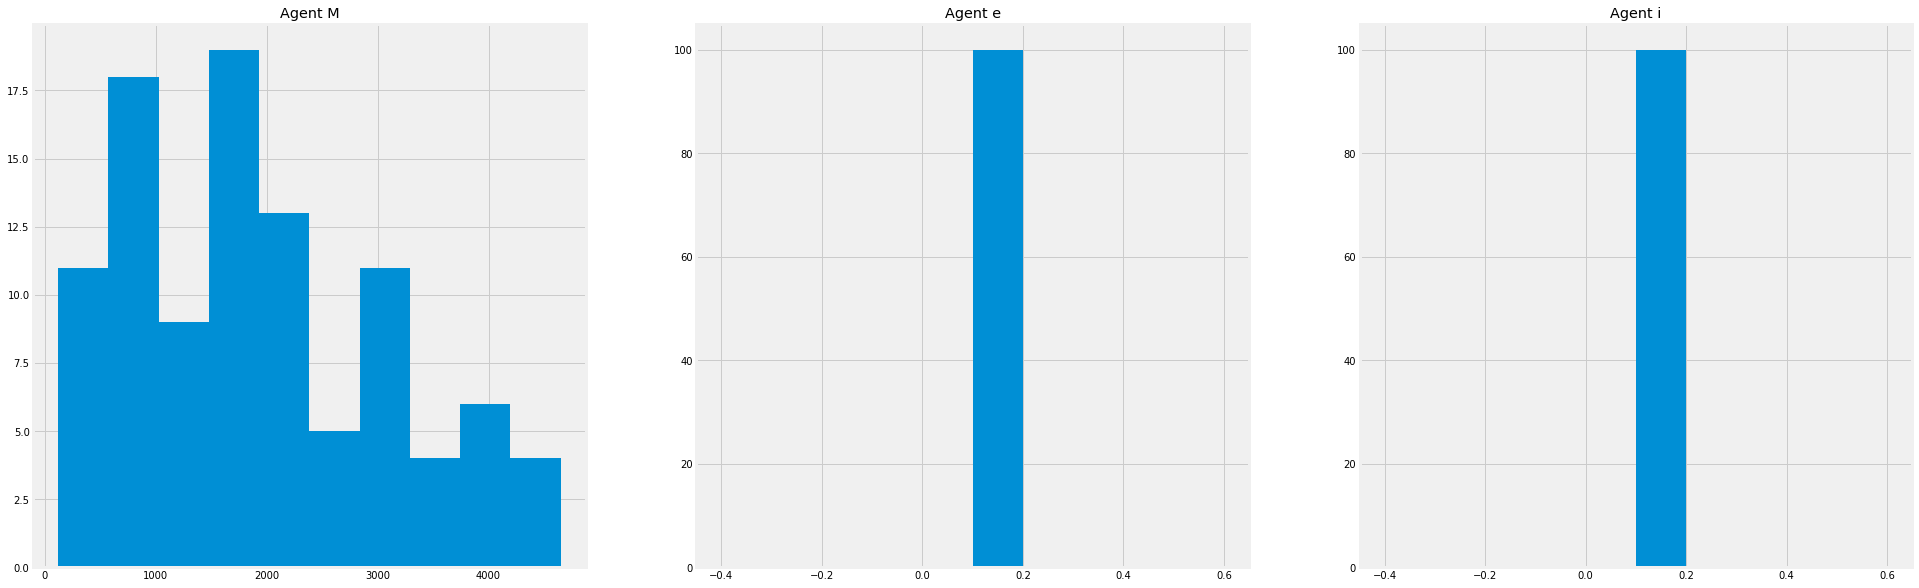

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 327.0, Temptation: 363.0, Sucker: -36.0, Punishment: 0
Agent 1 playing Agent 0: Reward: 70.0, Temptation: 78.0, Sucker: -8.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 198.0, Temptation: 220.0, Sucker: -22.0, Punishment: 0
Agent 2 playing Agent 0: Reward: 70.0, Temptation: 78.0, Sucker: -8.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 180.0, Temptation: 200.0, Sucker: -20.0, Punishment: 0
Agent 3 playing Agent 0: Reward: 70.0, Temptation: 78.0, Suck

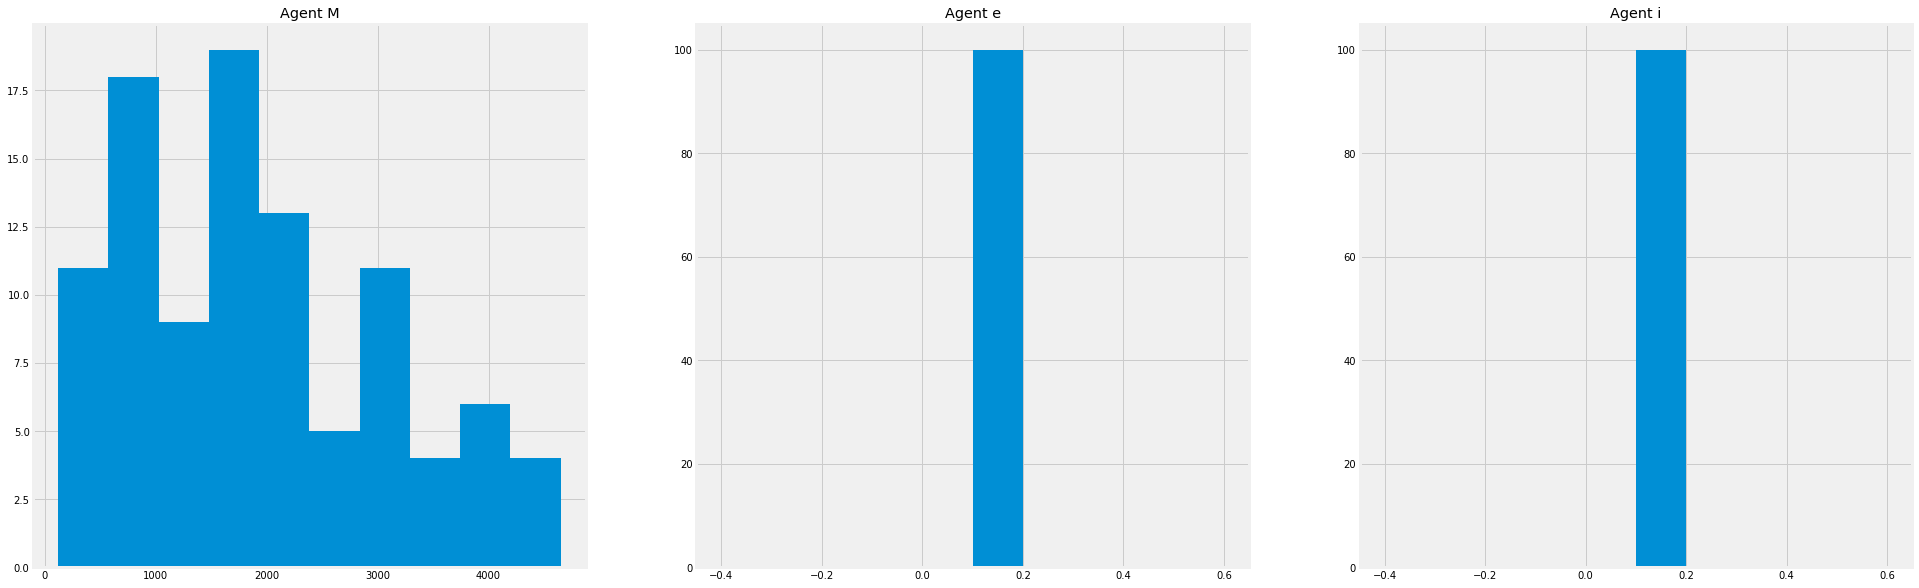

In [2]:
# if we want to run simulations with heterogenous populations - we need to set homogeneous to false, 
# and we have the option to set a value for M, E, and I for heterogenous populations (defaults are 1000, 0.1, 0.1 for homogenous)

# first number is median, second standard deviation
M = [1000, 2000]
E = [0.1, 0.00001]
I = [0.1, 0.00001]

# create a list of agents, default = 100
agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)
check_parameters(agents) #correct result because homogenous = True

Tournament has started...
Tournament has ended. The simulation took 26 minutes.
    S.D.  Counts Seed
0    0.5     245  512
1    0.6     257  512
2    0.7     280  512
3    0.8     260  512
4    0.9     224  512
5    1.0     212  512
6    1.1     189  512
7    1.2     150  512
8    1.3     134  512
9    1.4     131  512
10   1.5     113  512
11   1.6      98  512
12   1.7      81  512
13   1.8      66  512
14   1.9      47  512
15   2.0      43  512
16   2.1      29  512
17   2.2      24  512
18   2.3      16  512
19   2.4       5  512
20   2.5       2  512
21   2.6       0  512
22   2.7       0  512
23   2.8       0  512
24   2.9       0  512
25   3.0       0  512


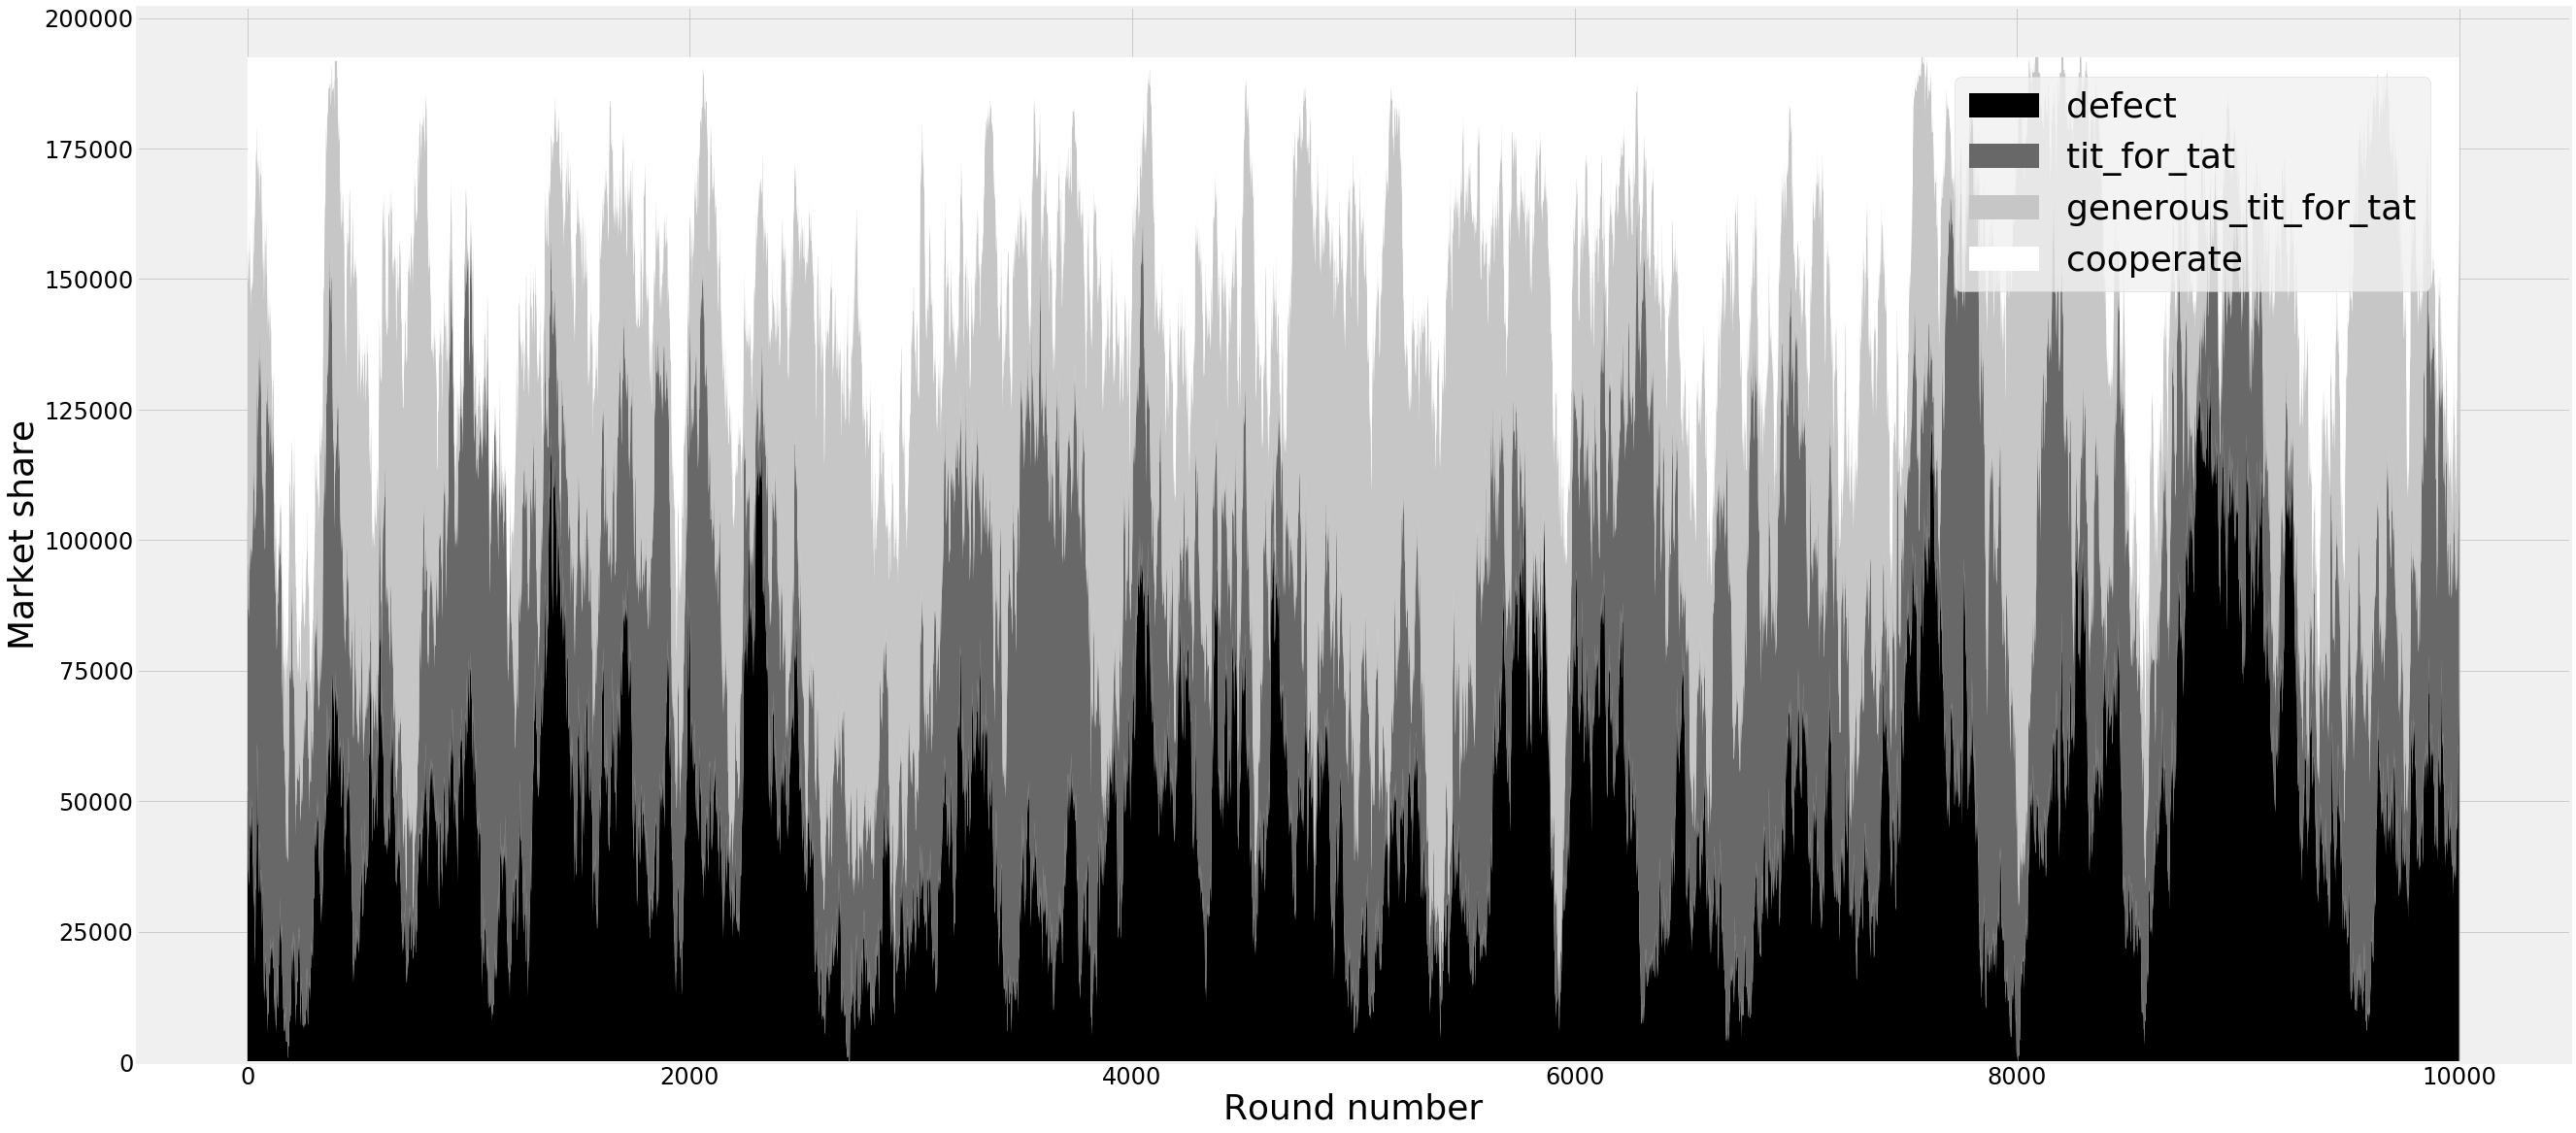

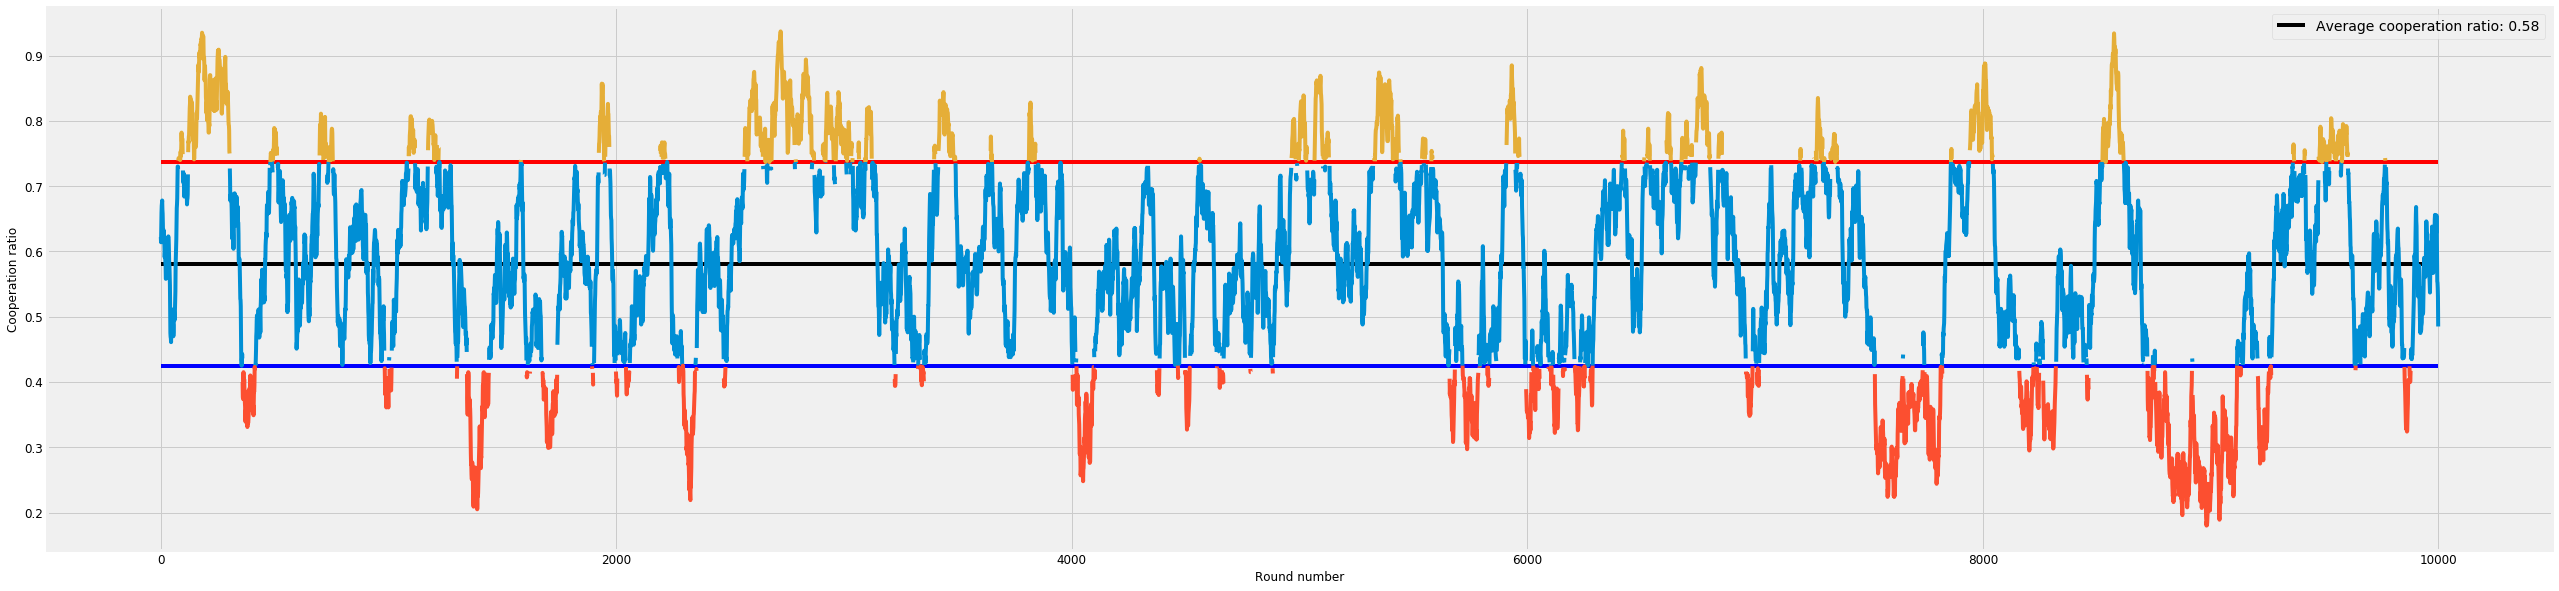

In [3]:
tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values()), 'Seed': str(seed)}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_" + str(seed) + "_outliercounts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, type_of_tournament= "_changing_sdm", seed = str(seed))